# PLOTS DESCRIBING THE ONSETS WITH THE METADATA

This blog plots basic graphic visuals related to the cleaned Coswara annotated cough data, highlighting the number of cough onsets in each file, and its relation to the metadata data as well as annotation segments.

In [1]:
#hide
import numpy as np
import pandas as pd
onset_info=pd.read_csv('heavy_cough_details.csv')
#cough_files_data = pd.read_csv('clean-heavy-cough-files.csv')
clean_cough_files_data=pd.read_csv('clean-heavy-cough-files.csv')

In [2]:
#hide
onset_info.insert(4, 'Num_of_annotation_seg',1)
onset_info.insert(5, 'average_length_of_each_seg',1)

In [3]:
#hide
cough_id_list=list(onset_info['id'])
cough_paths=[]
for file in cough_id_list:
    cough_paths=cough_paths+['cough-heavy-clean-files/'+file+'/cough-heavy.wav']


In [7]:
#hide
for f in range(len(cough_paths)):
    num_seg=0
    s=0
    for num_of_ann_seg in range(12):
        if(np.isnan(clean_cough_files_data['start_{}'.format(num_of_ann_seg+1)][f])== False):
            num_seg=num_seg+1
    onset_info['Num_of_annotation_seg'][f] = num_seg
    
    for n in range(num_seg):
        s = s + (clean_cough_files_data['end_{}'.format(n+1)][f]-clean_cough_files_data['start_{}'.format(n+1)][f])
    print(round(s/num_seg,4))
    onset_info['average_length_of_each_seg'][f] = round(s/num_seg,4)
    

0.7603
0.7393
0.96
0.286
0.617
0.5153
0.961
0.6223
0.8167
0.714
0.5043
0.531
0.7105
1.1708
0.8407
0.274
1.81
1.1365
1.455
0.2787
0.4327
0.3287
0.8778
1.7757
1.5355
0.332
0.4553
1.2453
0.896
0.865
1.08
1.533
0.2515
1.823
0.5652
1.237
1.3885
0.818
0.3657
1.321
0.6427
1.1677
1.134
0.728
0.4298
0.8277
0.913
0.459
0.6093
0.891
1.526
0.3247
0.4975
1.0085
0.9875
0.8157
0.7287
0.3113
0.783
0.4643
1.6357
0.4287
0.481
0.9383
0.8195
0.33
0.982
0.389
1.0737
0.7113
0.666
0.7305
1.318
0.4724
0.7087
0.5263
0.7467
0.822
0.766
0.934
0.8417
0.535
0.58
1.2663
0.3847
0.9988
0.3807
0.4593
1.3357
0.6627
0.649
1.4507
0.626
0.272
0.5582
0.3747
0.9645
0.529
0.4093
1.509
0.6903
1.105
0.4208
0.5463
0.896
1.729
0.7576
0.9417
0.929
0.8985
0.8523
0.9593
0.625
0.8903
1.025
1.8723
0.9727
0.54
0.395
0.3033
1.674
0.356
0.3537
0.285
0.297
0.376
0.8477
0.5053
0.3417
0.442
0.687
0.4067
0.3033
0.531
0.6877
0.5153
0.4748
0.596
0.5875
0.6607
0.7535
0.5892
1.1227
1.1917
0.4213
0.909
0.9987
0.9345
0.4033
0.6987
0.569
0.617
0.4

/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [6]:
#hide
onset_info['average_length_of_each_seg']=onset_info['average_length_of_each_seg'].astype(float)

In [8]:
#hide

onset_info = onset_info.drop(columns=['Unnamed: 0'])

In [9]:
onset_info.columns

Index(['id', 'recording', 'upload_date', 'Num_of_annotation_seg',
       'average_length_of_each_seg', 'vol', 'cont', 'quality', 'stage', 'a',
       'covid_status', 'ep', 'g', 'l_c', 'l_l', 'l_s', 'rU', 'asthma', 'cough',
       'smoker', 'test', 'ht', 'cold', 'diabetes', 'um', 'ihd', 'bd', 'st',
       'fever', 'ftg', 'mp', 'loss_of_smell', 'cld', 'pneumonia',
       'num_of_onsets', 'onset_1', 'onset_2', 'onset_3', 'onset_4', 'onset_5',
       'onset_6', 'onset_7', 'onset_8', 'onset_9', 'onset_10', 'onset_11',
       'onset_12', 'onset_13', 'onset_14', 'onset_15', 'onset_16', 'onset_17',
       'onset_18', 'onset_19', 'onset_20'],
      dtype='object')

In [10]:
#hide
onset_info.insert(11, 'status', 'covid')

In [11]:
#hide
onset_info.insert(12, 'health_status', 'unhealthy')

In [12]:
#hide
(onset_info['covid_status']).value_counts()

healthy                        233
positive_mild                   54
no_resp_illness_exposed         31
recovered_full                  16
positive_asymp                  13
resp_illness_not_identified     10
positive_moderate                8
Name: covid_status, dtype: int64

In [13]:
#hide
onset_info.columns

Index(['id', 'recording', 'upload_date', 'Num_of_annotation_seg',
       'average_length_of_each_seg', 'vol', 'cont', 'quality', 'stage', 'a',
       'covid_status', 'status', 'health_status', 'ep', 'g', 'l_c', 'l_l',
       'l_s', 'rU', 'asthma', 'cough', 'smoker', 'test', 'ht', 'cold',
       'diabetes', 'um', 'ihd', 'bd', 'st', 'fever', 'ftg', 'mp',
       'loss_of_smell', 'cld', 'pneumonia', 'num_of_onsets', 'onset_1',
       'onset_2', 'onset_3', 'onset_4', 'onset_5', 'onset_6', 'onset_7',
       'onset_8', 'onset_9', 'onset_10', 'onset_11', 'onset_12', 'onset_13',
       'onset_14', 'onset_15', 'onset_16', 'onset_17', 'onset_18', 'onset_19',
       'onset_20'],
      dtype='object')

In [14]:
#hide
for l in range(365):
    if(onset_info['covid_status'][l] == 'healthy'):
        onset_info['status'][l] = 'non_covid'
    elif(onset_info['covid_status'][l] == 'no_resp_illness_exposed'):
        onset_info['status'][l] = 'non_covid'
    elif(onset_info['covid_status'][l] == 'resp_illness_not_identified'):
        onset_info['status'][l] = 'non_covid'
    else:
        onset_info['status'][l] = 'covid'
               

/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [15]:
#hide
for l in range(365):
    if(onset_info['covid_status'][l] == 'healthy'):
        onset_info['health_status'][l] = 'healthy'
    elif(onset_info['covid_status'][l] == 'no_resp_illness_exposed'):
        onset_info['health_status'][l] = 'healthy'
    else:
        onset_info['health_status'][l] = 'unhealthy'

/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


The plot below gives the gender based distributions of various categories of status of the patients.

Text(0.5, 1.0, 'status')

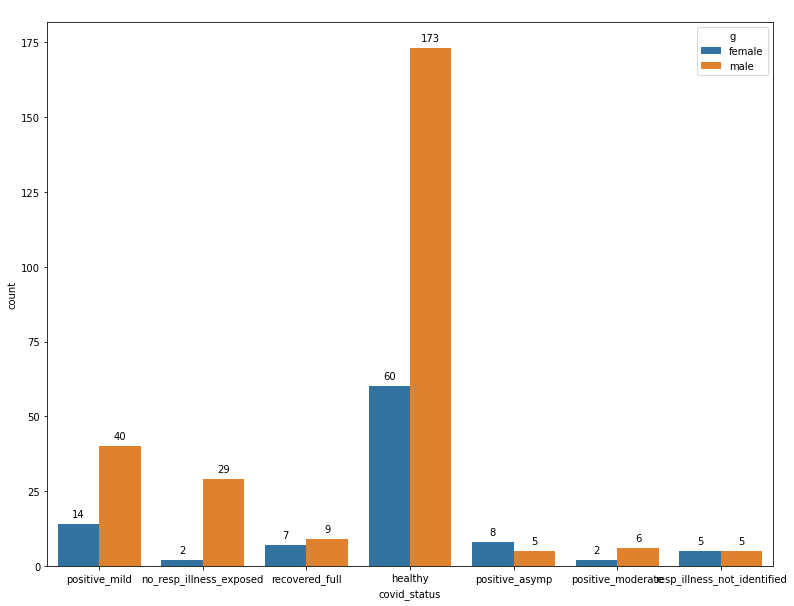

In [16]:
#hide_input
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
splot=sns.countplot(data=onset_info, x='covid_status', hue='g')
for p in splot.patches:
    splot.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
               va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Covid_statuscount.png')
plt.title('status', color='white')

This plots below shows that out of 369 clean annotated cough files, 91 are covid positive, but 101 are unhealthy( the rest due to unknown reasons other than covid).

Text(0.5, 1.0, 'health status')

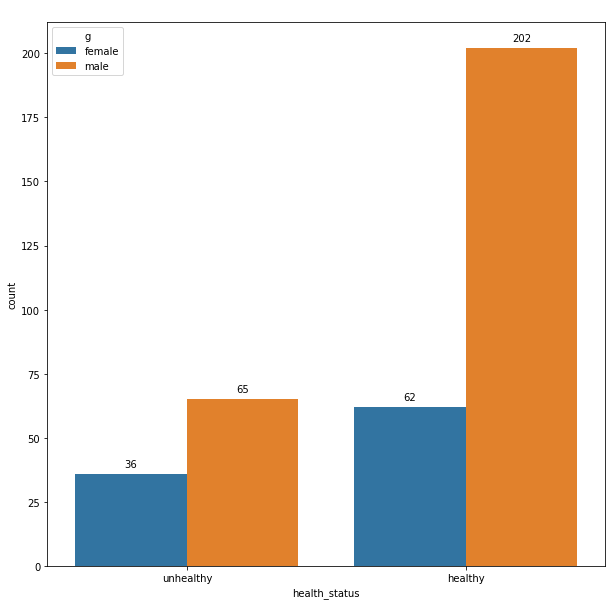

In [17]:
#hide_input
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
splot=sns.countplot(data=onset_info, x='health_status', hue='g')
for p in splot.patches:
    splot.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
               va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('health_statuscount.png')
plt.title('health status', color='white')

Text(0.5, 1.0, 'Covid health status')

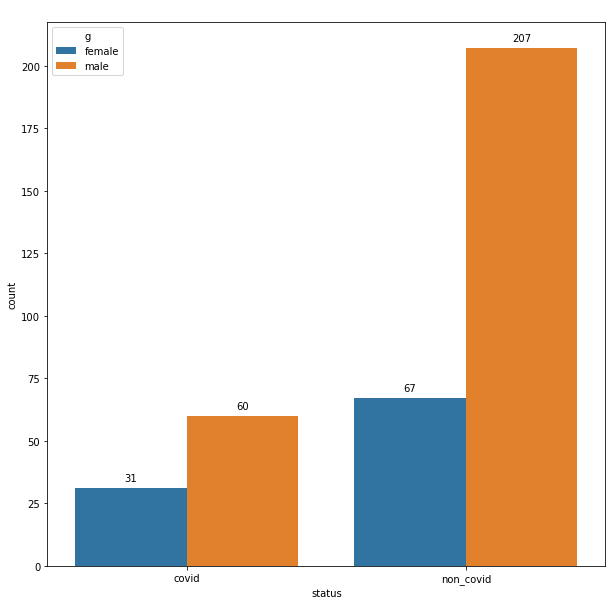

In [18]:
#hide_input
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
splot=sns.countplot(data=onset_info, x='status', hue='g')
for p in splot.patches:
    splot.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
               va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('number_of_covidcount.png')
plt.title('Covid health status', color='white')

Plotting the distribution of duration between onsets

The minimum number of onsets is 2, the minimum and maximum duration between onsets was also calculated.

In [19]:
#hide
np.sum(onset_info['num_of_onsets'])

2382

In [20]:
#hide
duration_between_onsets=[]
for f in range(len(cough_paths)):  
    for num in range(onset_info['num_of_onsets'][f] - 1):
        x=onset_info['onset_{}'.format(num+2)][f]-onset_info['onset_{}'.format(num+1)][f]
        if(x<0):
            print(f)
            print(num)
            print(onset_info['num_of_onsets'][f])
        duration_between_onsets = duration_between_onsets + [onset_info['onset_{}'.format(num+2)][f]-onset_info['onset_{}'.format(num+1)][f]]
                                                            
    

In [21]:
len(duration_between_onsets)

2017

In [22]:
#hide
duration_df=pd.DataFrame(duration_between_onsets, columns=['dur'])
duration_df['dur'].dtype

dtype('float64')

0.005999999999999561
6.0360000000000005


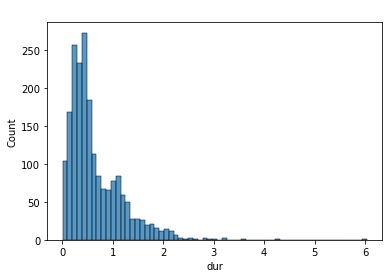

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=duration_df , x='dur')
plt.title('Histogram of duration between cough onsets', color='white')
print(np.min(duration_between_onsets))
print(np.max(duration_between_onsets))

In [61]:
np.min(onset_info['num_of_onsets'])

2

The plots below show the relation of data points bewteen number of onsets and annotation parameters

Text(0.5, 1.0, 'length of each segment versus number of onsets')

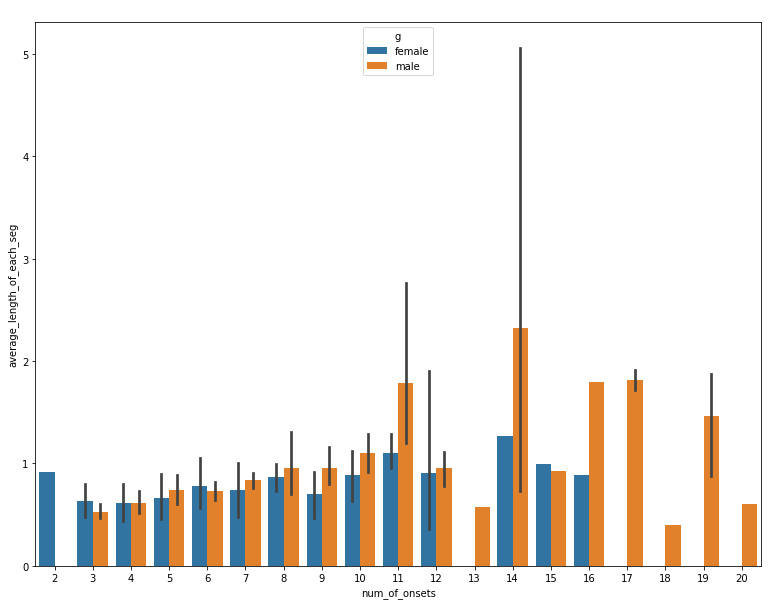

In [24]:
#hide_input
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
sns.barplot(data=onset_info, y='average_length_of_each_seg'
               ,x= 'num_of_onsets', hue='g')
plt.title('length of each segment versus number of onsets', color='white')

Text(0.5, 1.0, 'Number of annotated segments per file versus number of onsets')

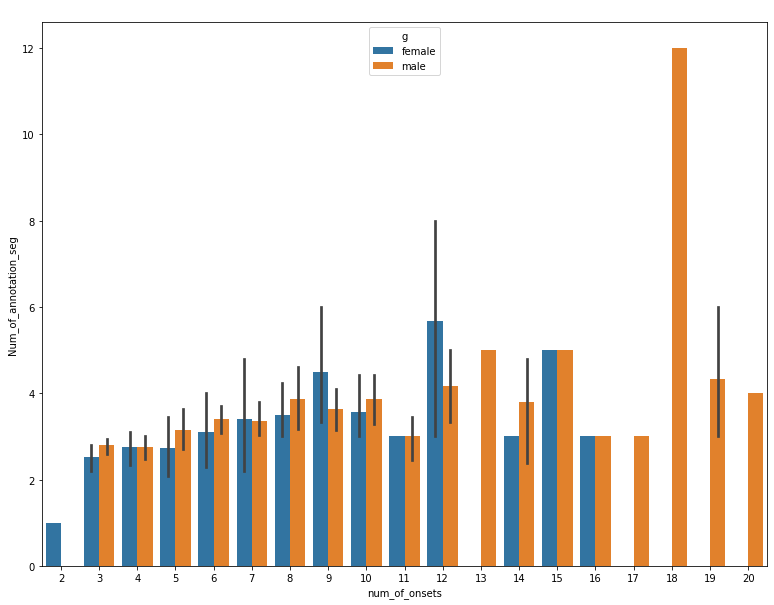

In [25]:
#hide_input
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
sns.barplot(data=onset_info, y='Num_of_annotation_seg'
               ,x= 'num_of_onsets', hue='g')
plt.title('Number of annotated segments per file versus number of onsets', color='white')

The plots further below, show a relation/distribution between number of segments in each user file, numner of onsets of cough in each file, and symptoms claimed by each such user(cough, cold, pneumonia, asthma, fever)

Text(0.5, 1.0, 'Number of annotated segments per file versus number of onsets (observed Metadata:Cough)')

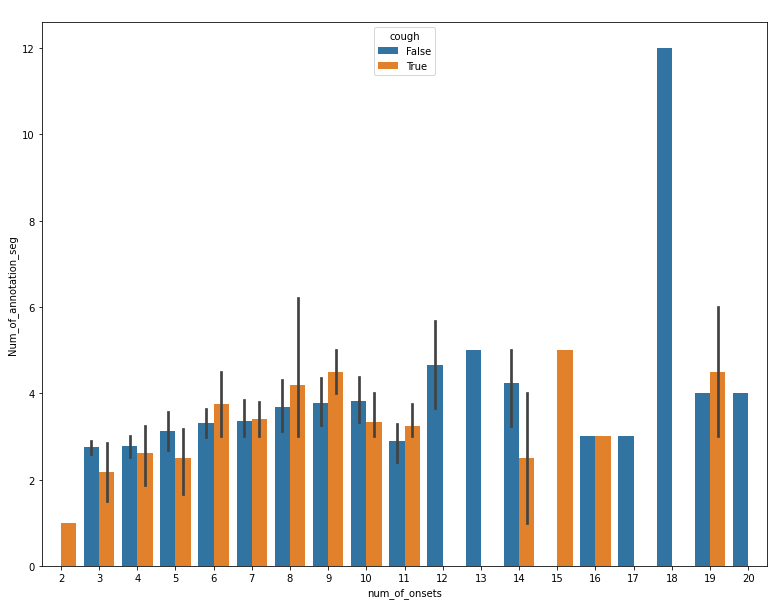

In [26]:
#hide
import seaborn as sns
import matplotlib.pyplot as plt
onset_info['cough'] = onset_info['cough'].fillna(False)
plt.figure(figsize=(13,10))
sns.barplot(data=onset_info, y='Num_of_annotation_seg'
               ,x= 'num_of_onsets', hue='cough')
plt.title('Number of annotated segments per file versus number of onsets (observed Metadata:Cough)', color='white')

Text(0.5, 1.0, 'length of each segment versus number of onsets (observed metadata:cough)')

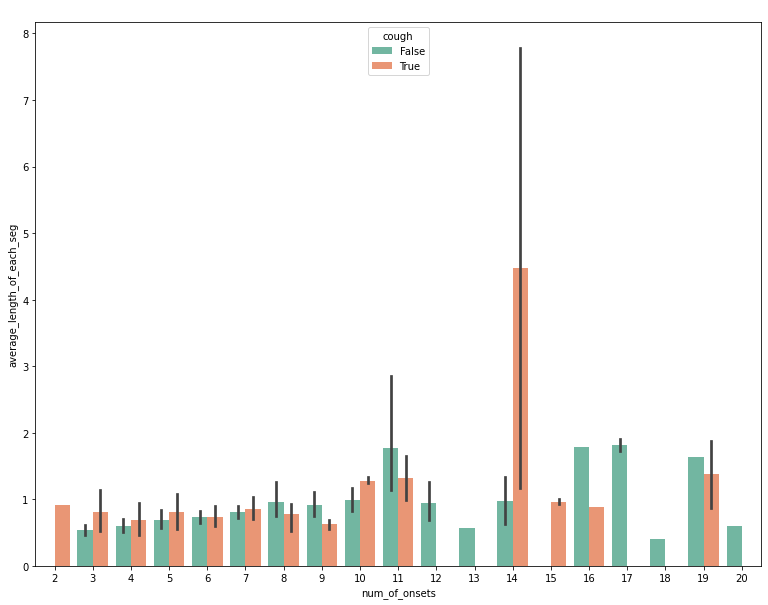

In [27]:
#hide_input
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
sns.barplot(data=onset_info, y='average_length_of_each_seg'
               ,x= 'num_of_onsets', hue='cough', palette="Set2")
plt.title('length of each segment versus number of onsets (observed metadata:cough)', color='white')

Text(0.5, 1.0, 'length of each segment versus number of onsets(observed metadata: cold)')

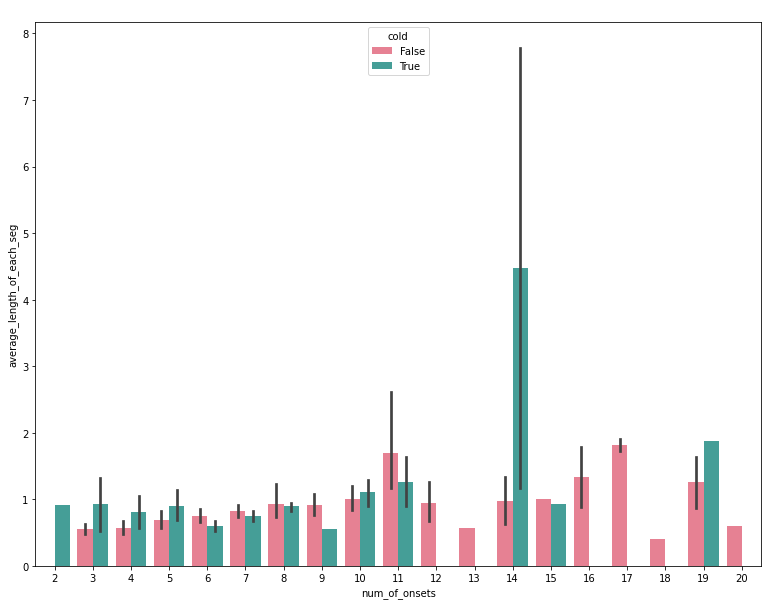

In [28]:
#hide_input
import seaborn as sns
import matplotlib.pyplot as plt
onset_info['cold'] = onset_info['cold'].fillna(False)
plt.figure(figsize=(13,10))
sns.barplot(data=onset_info, y='average_length_of_each_seg'
               ,x= 'num_of_onsets', hue='cold', palette="husl")
plt.title('length of each segment versus number of onsets(observed metadata: cold)', color='white')

Text(0.5, 1.0, 'Number of annotated segments per file versus number of onsets(observed metadata: fever)')

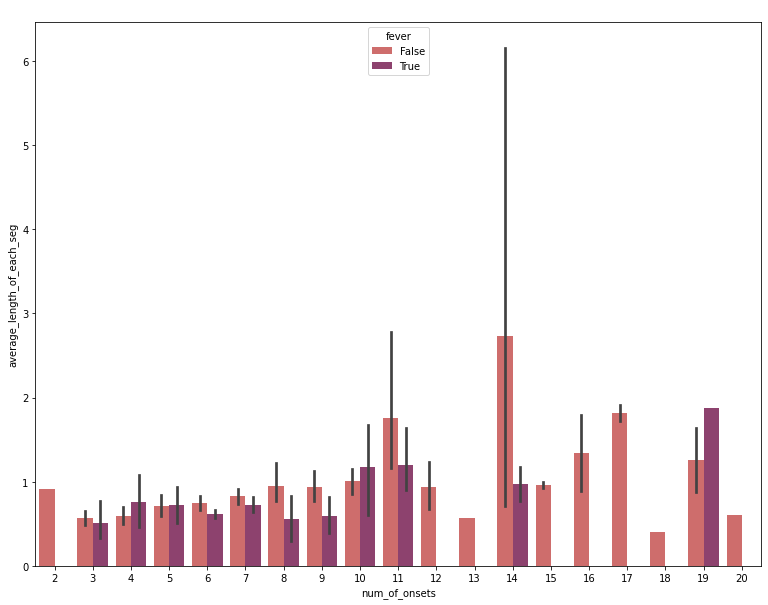

In [29]:
#hide_input
import seaborn as sns
import matplotlib.pyplot as plt
onset_info['fever'] = onset_info['fever'].fillna(False)
plt.figure(figsize=(13,10))
sns.barplot(data=onset_info, y='average_length_of_each_seg'
               ,x= 'num_of_onsets', hue='fever', palette='flare')
plt.title('Number of annotated segments per file versus number of onsets(observed metadata: fever)', color='white')